<a href="https://colab.research.google.com/github/simaafshar/MNase-data/blob/master/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


2025-07-06 20:12:28.786 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.917 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-06 20:12:28.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 20:12:28.926 Thread 'MainThread': mi

DeltaGenerator()

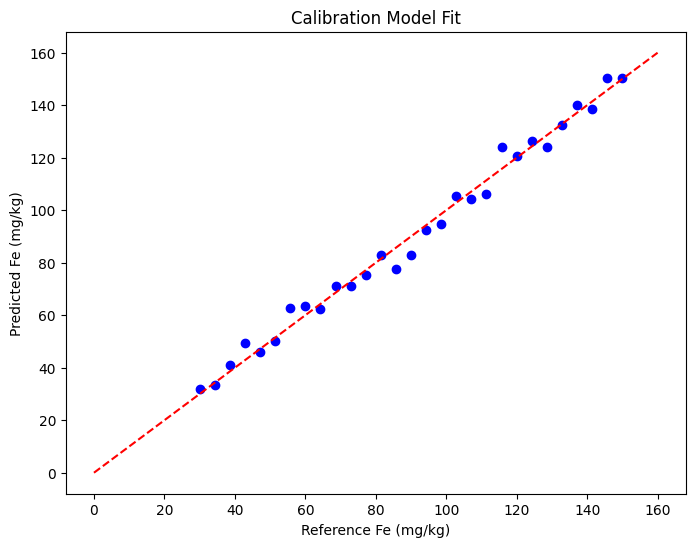

In [ ]:
import numpy as np
import pandas as pd
import streamlit as st
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Simulated data (same as before)
np.random.seed(42)
n_samples = 29
reference_Fe = np.linspace(30, 150, n_samples)
C_K = np.linspace(7000, 9000, n_samples)
C_Ca = np.linspace(6000, 7000, n_samples)

true_a0 = 0.5
true_a1 = 0.015
true_alpha_K = 1e-7
true_alpha_Ca = -1e-7

ideal_counts = (reference_Fe / (1 + true_alpha_K * C_K + true_alpha_Ca * C_Ca) - true_a0) / true_a1
noise = np.random.normal(0, 300, size=n_samples)
I_Fe = ideal_counts + noise

def model(params, I_Fe, C_K, C_Ca):
    a0, a1, alpha_K, alpha_Ca = params
    return (a0 + a1 * I_Fe) * (1 + alpha_K * C_K + alpha_Ca * C_Ca)

def objective(params, I_Fe, C_K, C_Ca, Fe_reference):
    Fe_pred = model(params, I_Fe, C_K, C_Ca)
    return np.sum((Fe_pred - Fe_reference)**2)

initial_params = [0.0, 0.01, 0.0, 0.0]

result = minimize(
    objective,
    initial_params,
    args=(I_Fe, C_K, C_Ca, reference_Fe),
    method='L-BFGS-B'
)

a0, a1, alpha_K, alpha_Ca = result.x
Fe_predicted = model(result.x, I_Fe, C_K, C_Ca)

SS_res = np.sum((reference_Fe - Fe_predicted)**2)
SS_tot = np.sum((reference_Fe - np.mean(reference_Fe))**2)
R_squared = 1 - (SS_res / SS_tot)
SEC = np.sqrt(SS_res / (n_samples - 4))

# Streamlit display
st.title("XRF Calibration Dashboard")

st.write("**Fitted Parameters:**")
st.write(f"a0 = {a0:.6f}")
st.write(f"a1 = {a1:.6f}")
st.write(f"alpha_K = {alpha_K:.6e}")
st.write(f"alpha_Ca = {alpha_Ca:.6e}")
st.write(f"R-squared = {R_squared:.4f}")
st.write(f"Standard Error of Calibration (SEC) = {SEC:.2f} mg/kg")

df = pd.DataFrame({
    "Reference_Fe": reference_Fe,
    "Predicted_Fe": Fe_predicted,
    "C_K": C_K,
    "C_Ca": C_Ca,
    "I_Fe": I_Fe
})

st.write("**Calibration Data:**")
st.dataframe(df)

st.write("**Calibration Plot:**")
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(reference_Fe, Fe_predicted, color="blue")
ax.plot([0,160],[0,160],'r--')
ax.set_xlabel("Reference Fe (mg/kg)")
ax.set_ylabel("Predicted Fe (mg/kg)")
ax.set_title("Calibration Model Fit")
st.pyplot(fig)


In [ ]:
cd /content/sample_data


/content/sample_data


In [ ]:
streamlit run xrf_dashboard.py


SyntaxError: invalid syntax (ipython-input-4-239573549.py, line 1)